In [48]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
%matplotlib inline
plt.rcParams.update({'font.size': 20})
colors = ['lightblue', 'pink']
feature_keys = ['total words','total uniq', 'total wpt','D uniq','D words',\
                'D wpt','D pos_avg','P uniq','P words','P wpt','P pos_avg']
outcome = ['discDmind3','cumulative rating']
df_phase1  = pd.read_csv('phase1_lect_ata_new_df.csv')
df_phase2  = pd.read_csv('phase2_lect_ata_new_df.csv')
df = pd.concat([df_phase1,df_phase2])

df_sent  = pd.read_csv('all_w_sent.csv',encoding = "ISO-8859-1")
df_liwc  = pd.read_csv('all_w_liwc.csv',encoding = "ISO-8859-1")
#df_liwc = df_liwc.groupby(['Filename']).mean()
#df_sent = df_sent.groupby(['Filename']).mean()
def get_male_female_files(p_male,d_male):
	phase1_files = df_phase1[(df_phase1['isPatientMale']==p_male)&(df_phase1['isDoctorMale']==d_male)]['Filename'].tolist()
	phase2_files = df_phase2[(df_phase2['isPatientMale']==p_male)&(df_phase2['isDoctorMale']==d_male)]['Filename'].tolist()
	return phase1_files+phase2_files

male_doctor_file_names = get_male_female_files(0,1)+ get_male_female_files(1,1)
female_doctor_file_names = get_male_female_files(0,0)+ get_male_female_files(1,0)
male_patient_file_names = get_male_female_files(1,0)+ get_male_female_files(1,1)
female_patient_file_names = get_male_female_files(0,0)+ get_male_female_files(0,1)

maleD_femaleP_file_names = get_male_female_files(0,1)
maleD_maleP_file_names = get_male_female_files(1,1)
femaleD_femaleP_file_names = get_male_female_files(0,0)
femaleD_maleP_file_names = get_male_female_files(1,0)

<h2>Overall Discordance </h2>

Best Error =  3.3256517926527636 alpha =  0.05
Best Error =  14.515385631219749 alpha =  0.05


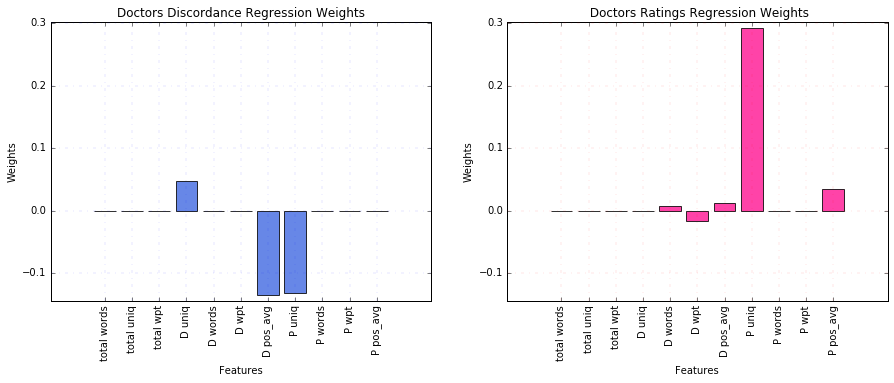

In [18]:
XY = df[feature_keys+outcome].dropna()
X = XY[feature_keys]
X = scale(X)
Y = XY['discDmind3']
best_err = np.inf
best_alpha = 0
for a in np.arange(0.05,1,0.1):
    clf = linear_model.SGDRegressor(alpha = a,penalty='l1',n_iter = 2000).fit(X,Y)
    ans = clf.predict(X)
    err = mean_squared_error(ans,Y)
    if(err < best_err):
        best_alpha = a
        best_err = err
        discordance_coefs = clf.coef_
print('Best Error = ', best_err, 'alpha = ', best_alpha)

Y = XY['cumulative rating']
best_err = np.inf
best_alpha = 0
for a in np.arange(0.05,1,0.1):
    clf = linear_model.SGDRegressor(alpha = a,penalty='l1',n_iter = 2000).fit(X,Y)
    ans = clf.predict(X)
    err = mean_squared_error(ans,Y)
    if(err < best_err):
        best_alpha = a
        best_err = err
        rating_coefs = clf.coef_
print('Best Error = ', best_err, 'alpha = ', best_alpha)

down = np.min(discordance_coefs.tolist()+rating_coefs.tolist())-0.01
up = np.max(discordance_coefs.tolist()+rating_coefs.tolist())+0.01
y_pos = np.arange(len(feature_keys))
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.xticks(rotation=90)
plt.bar(y_pos, discordance_coefs, align='center', alpha=0.8,color = 'royalblue')
plt.ylim(down,up)
plt.xticks(y_pos, feature_keys)
plt.ylabel('Weights')
plt.xlabel('Features')
plt.title('Doctors Discordance Regression Weights')
plt.grid(color='b', linestyle='-.', linewidth=0.1)
#plt.show()
plt.subplot(122)
plt.xticks(rotation=90)
plt.bar(y_pos, rating_coefs, align='center', alpha=0.8,color = 'deeppink')
plt.ylim(down,up)
plt.xticks(y_pos, feature_keys)
plt.ylabel('Weights')
plt.xlabel('Features')
plt.title(' Doctors Ratings Regression Weights')
plt.grid(color='r', linestyle='-.', linewidth=0.1)
plt.savefig('doctor-regression.png',bbox_inches='tight')

plt.show()


<h2>Male-Female Doctor regression on features for Discordance</h2>

In [19]:
XY = df[df['Filename'].isin(male_doctor_file_names)][feature_keys+outcome].dropna()
X = XY[feature_keys]
X = scale(X)
Y = XY['discDmind3']
best_err = np.inf
best_alpha = 0
for a in np.arange(0.05,1,0.1):
    clf = linear_model.SGDRegressor(alpha = a,penalty='l1',n_iter = 2000).fit(X,Y)
    ans = clf.predict(X)
    err = mean_squared_error(ans,Y)
    if(err < best_err):
        best_alpha = a
        best_err = err
        male_Ddiscordance_coefs = clf.coef_
print('Best Error = ', best_err, 'alpha = ', best_alpha)

XY = df[df['Filename'].isin(female_doctor_file_names)][feature_keys+outcome].dropna()
X = XY[feature_keys]
X = scale(X)
Y = XY['discDmind3']
best_err = np.inf
best_alpha = 0
for a in np.arange(0.05,1,0.1):
    clf = linear_model.SGDRegressor(alpha = a,penalty='l1',n_iter = 2000).fit(X,Y)
    ans = clf.predict(X)
    err = mean_squared_error(ans,Y)
    if(err < best_err):
        best_alpha = a
        best_err = err
        female_Ddiscordance_coefs = clf.coef_
print('Best Error = ', best_err, 'alpha = ', best_alpha)

Best Error =  3.3865578319310323 alpha =  0.05
Best Error =  2.9121123760395555 alpha =  0.05


[ 0.          0.          0.          0.03512351  0.          0.
 -0.07241038 -0.1825919   0.         -0.04430237  0.05826332] [ 0.          0.          0.          0.          0.          0.
 -0.39577932 -0.0507747   0.          0.05574736 -0.17975847]


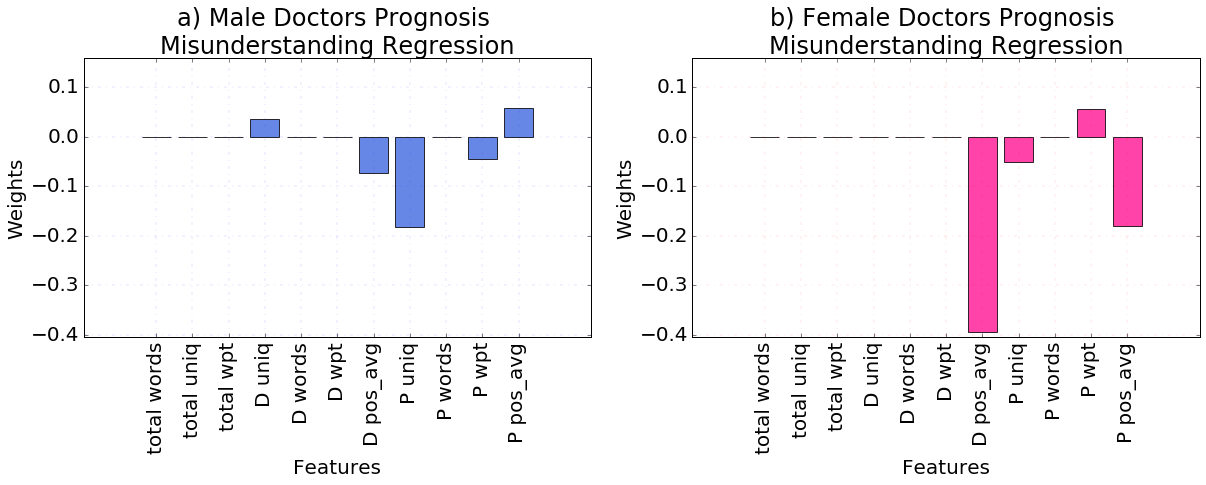

In [52]:
print(male_Ddiscordance_coefs,female_Ddiscordance_coefs)
down = np.min(male_Ddiscordance_coefs.tolist()+female_Ddiscordance_coefs.tolist())-0.01
up = np.max(male_Ddiscordance_coefs.tolist()+female_Ddiscordance_coefs.tolist())+0.1
y_pos = np.arange(len(feature_keys))
plt.figure(figsize=(20, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.xticks(rotation=90)
plt.bar(y_pos, male_Ddiscordance_coefs, align='center', alpha=0.8,color = 'royalblue')
plt.ylim(down,up)
plt.xticks(y_pos, feature_keys)
plt.ylabel('Weights')
plt.xlabel('Features')
plt.title('a) Male Doctors Prognosis \nMisunderstanding Regression')
plt.grid(color='b', linestyle='-.', linewidth=0.1)
#plt.show()
plt.subplot(122)
plt.xticks(rotation=90)
plt.bar(y_pos, female_Ddiscordance_coefs, align='center', alpha=0.8,color = 'deeppink')
plt.ylim(down,up)
plt.xticks(y_pos, feature_keys)
plt.ylabel('Weights')
plt.xlabel('Features')
plt.title('b) Female Doctors Prognosis \nMisunderstanding Regression')
plt.grid(color='r', linestyle='-.', linewidth=0.1)
plt.savefig('male-female-doctor-discordance-regression.png',bbox_inches='tight')

plt.show()

<h2>What does that mean</h2>
<li> Both male and female doctor has an opposite association with the positive sentiment and discordance. This means increasing Doctor positive sentiment will decrease discordance. </li>
<li>Patient positive sentiment has opposite magnitude in male and female doctors. This means decreasing patient positive sentiment will decrease the discordance among male doctors, but increasing positive sentiment will decrease discordance among female doctors.</li>
<li>If you are a male doctor let you patient decrease their positive sentiment, but if you are a female doctor make sure to help increase the patient positive sentiment.</li>

<h2>Male-Female Doctor regression on features for Cumulative Rating</h2>

In [43]:
XY = df[df['Filename'].isin(male_doctor_file_names)][feature_keys+outcome].dropna()
X = XY[feature_keys]
X = scale(X)
Y = XY['cumulative rating']
best_err = np.inf
best_alpha = 0
for a in np.arange(0.05,1,0.1):
    clf = linear_model.SGDRegressor(alpha = a,penalty='l1',n_iter = 2000).fit(X,Y)
    ans = clf.predict(X)
    err = mean_squared_error(ans,Y)
    if(err < best_err):
        best_alpha = a
        best_err = err
        male_Drating_coefs = clf.coef_
print('Best Error = ', best_err, 'alpha = ', best_alpha)


XY = df[df['Filename'].isin(female_doctor_file_names)][feature_keys+outcome].dropna()
X = XY[feature_keys]
X = scale(X)
Y = XY['cumulative rating']
best_err = np.inf
best_alpha = 0
for a in np.arange(0.05,1,0.1):
    clf = linear_model.SGDRegressor(alpha = a,penalty='l1',n_iter = 2000).fit(X,Y)
    ans = clf.predict(X)
    err = mean_squared_error(ans,Y)
    if(err < best_err):
        best_alpha = a
        best_err = err
        female_Drating_coefs = clf.coef_
print('Best Error = ', best_err, 'alpha = ', best_alpha)

Best Error =  16.2734570329371 alpha =  0.05
Best Error =  10.496069130877384 alpha =  0.05


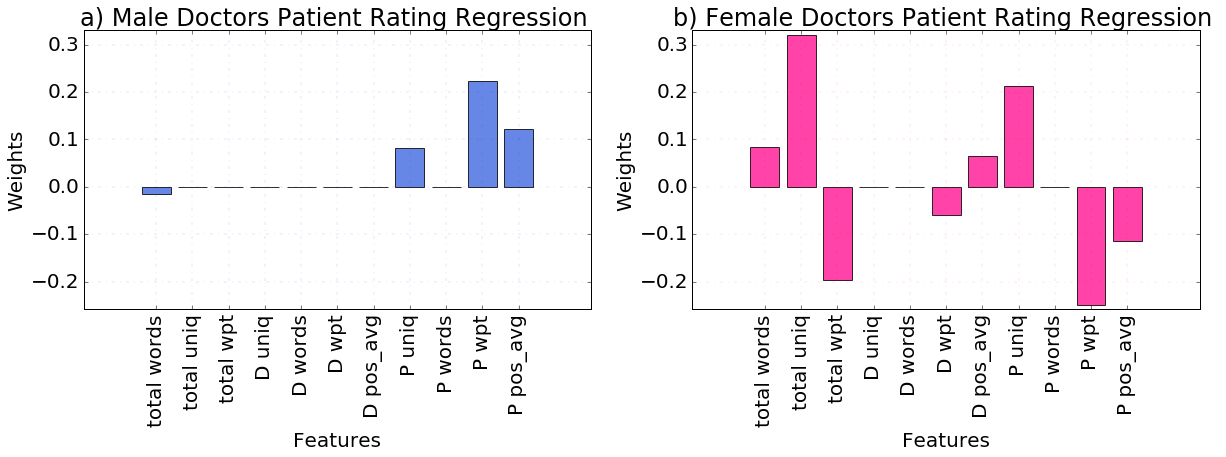

In [51]:
down = np.min(male_Drating_coefs.tolist()+female_Drating_coefs.tolist())-0.01
up = np.max(male_Drating_coefs.tolist()+female_Drating_coefs.tolist())+0.01

plt.figure(figsize=(20, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
y_pos = np.arange(len(feature_keys))
plt.xticks(rotation=90)
plt.bar(y_pos, male_Drating_coefs, align='center', alpha=0.8,color = 'royalblue')
plt.ylim(down,up)
plt.xticks(y_pos, feature_keys)
plt.ylabel('Weights')
plt.xlabel('Features')
plt.title('a) Male Doctors Patient Rating Regression ')
plt.grid(color='b', linestyle='-.', linewidth=0.1)
plt.subplot(122)
plt.xticks(rotation=90)
plt.bar(y_pos, female_Drating_coefs, align='center', alpha=0.8,color = 'deeppink')
plt.ylim(down,up)
plt.xticks(y_pos, feature_keys)
plt.ylabel('Weights')
plt.xlabel('Features')
plt.title('b) Female Doctors Patient Rating Regression ')
plt.grid(color='r', linestyle='-.', linewidth=0.1)
plt.savefig('male-female-doctor-rating-regression.png',bbox_inches='tight')
plt.show()

<h2>Among Male Doctors male-female regression for Discordance</h2>

In [23]:
XY = df[df['Filename'].isin(maleD_maleP_file_names)][feature_keys+outcome].dropna()
X = XY[feature_keys]
X = scale(X)
Y = XY['discDmind3']
best_err = np.inf
best_alpha = 0
for a in np.arange(0.05,1,0.1):
    clf = linear_model.SGDRegressor(alpha = a,penalty='l1',n_iter = 2000).fit(X,Y)
    ans = clf.predict(X)
    err = mean_squared_error(ans,Y)
    if(err < best_err):
        best_alpha = a
        best_err = err
        maleD_maleP_discordance_coefs = clf.coef_
print('Best Error = ', best_err, 'alpha = ', best_alpha)


XY = df[df['Filename'].isin(maleD_femaleP_file_names)][feature_keys+outcome].dropna()
X = XY[feature_keys]
X = scale(X)
Y = XY['discDmind3']
best_err = np.inf
best_alpha = 0
for a in np.arange(0.05,1,0.1):
    clf = linear_model.SGDRegressor(alpha = a,penalty='l1',n_iter = 2000).fit(X,Y)
    ans = clf.predict(X)
    err = mean_squared_error(ans,Y)
    if(err < best_err):
        best_alpha = a
        best_err = err
        maleD_femaleP_discordance_coefs = clf.coef_
print('Best Error = ', best_err, 'alpha = ', best_alpha)



Best Error =  3.213538050274392 alpha =  0.05
Best Error =  3.3769466471113896 alpha =  0.05


[ 0.         -0.2603526   0.          0.          0.11153419  0.12764889
 -0.0614102  -0.06883346  0.          0.          0.        ] [ 0.          0.28811463  0.          0.          0.         -0.15107483
 -0.0824548  -0.35434764  0.         -0.01851174  0.24392963]


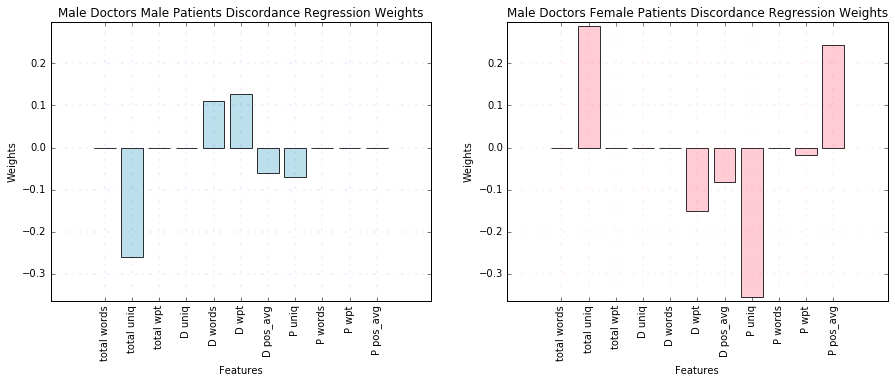

In [24]:
print(maleD_maleP_discordance_coefs,maleD_femaleP_discordance_coefs)
down = np.min(maleD_maleP_discordance_coefs.tolist()+maleD_femaleP_discordance_coefs.tolist())-0.01
up = np.max(maleD_maleP_discordance_coefs.tolist()+maleD_femaleP_discordance_coefs.tolist())+0.01
y_pos = np.arange(len(feature_keys))
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.xticks(rotation=90)
plt.bar(y_pos, maleD_maleP_discordance_coefs, align='center', alpha=0.8,color = 'lightblue')
plt.ylim(down,up)
plt.xticks(y_pos, feature_keys)
plt.ylabel('Weights')
plt.xlabel('Features')
plt.title('Male Doctors Male Patients Discordance Regression Weights')
plt.grid(color='b', linestyle='-.', linewidth=0.1)
#plt.show()
plt.subplot(122)
plt.xticks(rotation=90)
plt.bar(y_pos, maleD_femaleP_discordance_coefs, align='center', alpha=0.8,color = 'pink')
plt.ylim(down,up)
plt.xticks(y_pos, feature_keys)
plt.ylabel('Weights')
plt.xlabel('Features')
plt.title('Male Doctors Female Patients Discordance Regression Weights')
plt.grid(color='r', linestyle='-.', linewidth=0.1)
plt.savefig('maleD-male-female-patient-discordance-regression.png',bbox_inches='tight')
plt.show()

<h2>Among Male Doctors male-female regression for Cumulative Rating</h2>

In [25]:
XY = df[df['Filename'].isin(maleD_maleP_file_names)][feature_keys+outcome].dropna()
X = XY[feature_keys]
X = scale(X)
Y = XY['cumulative rating']
best_err = np.inf
best_alpha = 0
for a in np.arange(0.05,1,0.1):
    clf = linear_model.SGDRegressor(alpha = a,penalty='l1',n_iter = 2000).fit(X,Y)
    ans = clf.predict(X)
    err = mean_squared_error(ans,Y)
    if(err < best_err):
        best_alpha = a
        best_err = err
        maleD_maleP_rating_coefs = clf.coef_
print('Best Error = ', best_err, 'alpha = ', best_alpha)


XY = df[df['Filename'].isin(maleD_femaleP_file_names)][feature_keys+outcome].dropna()
X = XY[feature_keys]
X = scale(X)
Y = XY['cumulative rating']
best_err = np.inf
best_alpha = 0
for a in np.arange(0.05,1,0.1):
    clf = linear_model.SGDRegressor(alpha = a,penalty='l1',n_iter = 2000).fit(X,Y)
    ans = clf.predict(X)
    err = mean_squared_error(ans,Y)
    if(err < best_err):
        best_alpha = a
        best_err = err
        maleD_femaleP_rating_coefs = clf.coef_
print('Best Error = ', best_err, 'alpha = ', best_alpha)

Best Error =  12.33416673930547 alpha =  0.05
Best Error =  19.835554514117966 alpha =  0.05


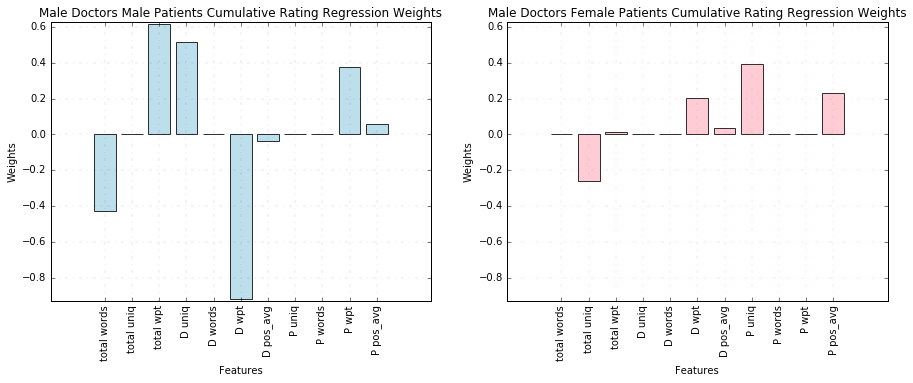

In [26]:
down = np.min(maleD_maleP_rating_coefs.tolist()+maleD_femaleP_rating_coefs.tolist())-0.01
up = np.max(maleD_maleP_rating_coefs.tolist()+maleD_femaleP_rating_coefs.tolist())+0.01
y_pos = np.arange(len(feature_keys))
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.xticks(rotation=90)
plt.bar(y_pos, maleD_maleP_rating_coefs, align='center', alpha=0.8,color = 'lightblue')
plt.ylim(down,up)
plt.xticks(y_pos, feature_keys)
plt.ylabel('Weights')
plt.xlabel('Features')
plt.title('Male Doctors Male Patients Cumulative Rating Regression Weights')
plt.grid(color='b', linestyle='-.', linewidth=0.1)
#plt.show()
plt.subplot(122)
plt.xticks(rotation=90)
plt.bar(y_pos, maleD_femaleP_rating_coefs, align='center', alpha=0.8,color = 'pink')
plt.ylim(down,up)
plt.xticks(y_pos, feature_keys)
plt.ylabel('Weights')
plt.xlabel('Features')
plt.title('Male Doctors Female Patients Cumulative Rating Regression Weights')
plt.grid(color='r', linestyle='-.', linewidth=0.1)
plt.savefig('maleD-male-female-patient-rating-regression.png',bbox_inches='tight')
plt.show()

<h2>Among Female Doctors male-female regression for Discordance</h2>

In [27]:
XY = df[df['Filename'].isin(femaleD_maleP_file_names)][feature_keys+outcome].dropna()
X = XY[feature_keys]
X = scale(X)
Y = XY['discDmind3']
best_err = np.inf
best_alpha = 0
for a in np.arange(0.05,1,0.1):
    clf = linear_model.SGDRegressor(alpha = a,penalty='l1',n_iter = 2000).fit(X,Y)
    ans = clf.predict(X)
    err = mean_squared_error(ans,Y)
    if(err < best_err):
        best_alpha = a
        best_err = err
        femaleD_maleP_discordance_coefs = clf.coef_
print('Best Error = ', best_err, 'alpha = ', best_alpha)



XY = df[df['Filename'].isin(femaleD_femaleP_file_names)][feature_keys+outcome].dropna()
X = XY[feature_keys]
X = scale(X)
Y = XY['discDmind3']
best_err = np.inf
best_alpha = 0
for a in np.arange(0.05,1,0.1):
    clf = linear_model.SGDRegressor(alpha = a,penalty='l1',n_iter = 2000).fit(X,Y)
    ans = clf.predict(X)
    err = mean_squared_error(ans,Y)
    if(err < best_err):
        best_alpha = a
        best_err = err
        femaleD_femaleP_discordance_coefs = clf.coef_
print('Best Error = ', best_err, 'alpha = ', best_alpha)


Best Error =  3.0107260132098492 alpha =  0.05
Best Error =  2.6177239166489317 alpha =  0.05


[-0.12806291 -0.02068688  0.27227113  0.01680739  0.          0.04100495
 -0.33404192  0.         -0.69797468  0.48100595 -0.24152096] [ 0.10517185  0.          0.          0.          0.         -0.06182492
 -0.40637423  0.          0.          0.03284234 -0.06271195]


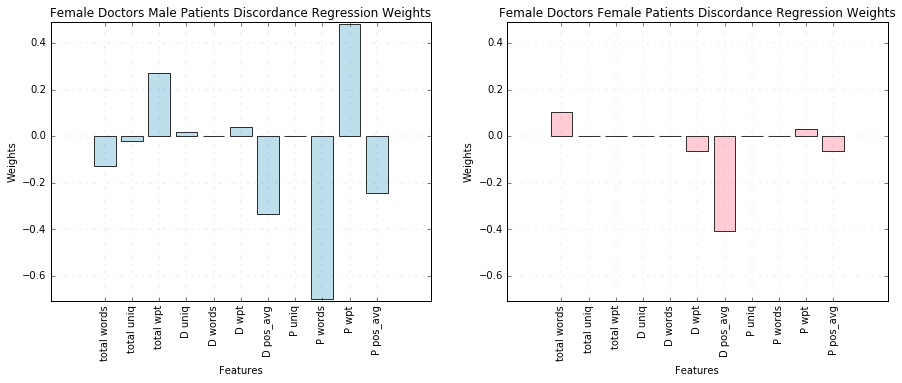

In [28]:
print(femaleD_maleP_discordance_coefs,femaleD_femaleP_discordance_coefs)
down = np.min(femaleD_maleP_discordance_coefs.tolist()+femaleD_femaleP_discordance_coefs.tolist())-0.01
up = np.max(femaleD_maleP_discordance_coefs.tolist()+femaleD_femaleP_discordance_coefs.tolist())+0.01
y_pos = np.arange(len(feature_keys))
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.xticks(rotation=90)
plt.bar(y_pos, femaleD_maleP_discordance_coefs, align='center', alpha=0.8,color = 'lightblue')
plt.ylim(down,up)
plt.xticks(y_pos, feature_keys)
plt.ylabel('Weights')
plt.xlabel('Features')
plt.title('Female Doctors Male Patients Discordance Regression Weights')
plt.grid(color='b', linestyle='-.', linewidth=0.1)
#plt.show()
plt.subplot(122)
plt.xticks(rotation=90)
plt.bar(y_pos, femaleD_femaleP_discordance_coefs, align='center', alpha=0.8,color = 'pink')
plt.ylim(down,up)
plt.xticks(y_pos, feature_keys)
plt.ylabel('Weights')
plt.xlabel('Features')
plt.title('Female Doctors Female Patients Discordance Regression Weights')
plt.grid(color='r', linestyle='-.', linewidth=0.1)
plt.savefig('femaleD-male-female-patient-discordance-regression.png',bbox_inches='tight')
plt.show()

<h2>Among Female Doctors male-female Cumulative Rating for Discordance</h2>


In [29]:
XY = df[df['Filename'].isin(femaleD_maleP_file_names)][feature_keys+outcome].dropna()
X = XY[feature_keys]
X = scale(X)
Y = XY['cumulative rating']
best_err = np.inf
best_alpha = 0
for a in np.arange(0.05,1,0.1):
    clf = linear_model.SGDRegressor(alpha = a,penalty='l1',n_iter = 2000).fit(X,Y)
    ans = clf.predict(X)
    err = mean_squared_error(ans,Y)
    if(err < best_err):
        best_alpha = a
        best_err = err
        femaleD_maleP_rating_coefs = clf.coef_
print('Best Error = ', best_err, 'alpha = ', best_alpha)


XY = df[df['Filename'].isin(femaleD_femaleP_file_names)][feature_keys+outcome].dropna()
X = XY[feature_keys]
X = scale(X)
Y = XY['cumulative rating']
best_err = np.inf
best_alpha = 0
for a in np.arange(0.05,1,0.1):
    clf = linear_model.SGDRegressor(alpha = a,penalty='l1',n_iter = 2000).fit(X,Y)
    ans = clf.predict(X)
    err = mean_squared_error(ans,Y)
    if(err < best_err):
        best_alpha = a
        best_err = err
        femaleD_femaleP_rating_coefs = clf.coef_
print('Best Error = ', best_err, 'alpha = ', best_alpha)

Best Error =  9.654619831917982 alpha =  0.05
Best Error =  10.00382572700061 alpha =  0.05


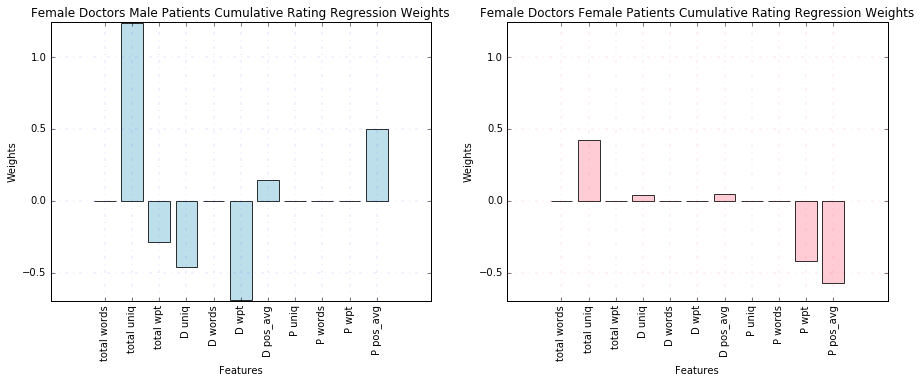

In [30]:
down = np.min(femaleD_maleP_rating_coefs.tolist()+femaleD_femaleP_rating_coefs.tolist())-0.01
up = np.max(femaleD_maleP_rating_coefs.tolist()+femaleD_femaleP_rating_coefs.tolist())+0.01
y_pos = np.arange(len(feature_keys))
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.xticks(rotation=90)
plt.bar(y_pos, femaleD_maleP_rating_coefs, align='center', alpha=0.8,color = 'lightblue')
plt.ylim(down,up)
plt.xticks(y_pos, feature_keys)
plt.ylabel('Weights')
plt.xlabel('Features')
plt.title('Female Doctors Male Patients Cumulative Rating Regression Weights')
plt.grid(color='b', linestyle='-.', linewidth=0.1)
#plt.show()
plt.subplot(122)
plt.xticks(rotation=90)
plt.bar(y_pos, femaleD_femaleP_rating_coefs, align='center', alpha=0.8,color = 'pink')
plt.ylim(down,up)
plt.xticks(y_pos, feature_keys)
plt.ylabel('Weights')
plt.xlabel('Features')
plt.title('Female Doctors Female Patients Cumulative Rating Regression Weights')
plt.grid(color='r', linestyle='-.', linewidth=0.1)
plt.savefig('femaleD-male-female-patient-rating-regression.png',bbox_inches='tight')
plt.show()